In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(training_data)

60000

In [ ]:
# Print size of whole training dataset
size_of_training_data = len(training_data)

# SPLITTING DATA INTO 'TRAIN-' AND 'VAL-' sets.

# Init your PyTorch Dataset object
original_data = training_data
size_of_original_data = len(training_data)

# Specify split fractions: !Must sum to 1!
train_fraction = 0.70
val_fraction = 0.30


# Determine size of each set
train_dataset_size = int(train_fraction * size_of_original_data)
val_dataset_size = int(val_fraction * size_of_original_data)

# Split whole original data into train, val and test datsets
train_dataset, val_dataset = torch.utils.data.random_split(
    original_data,
    [train_dataset_size, val_dataset_size])

In [ ]:
# Sanity checking
print(f" Train set Size: {len(train_dataset)}")
print(f" Val set Size: {len(val_dataset)}")

 Train set Size: 42000
 Val set Size: 18000


In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_model_performance(dataset, model):
# Function that takes in a model and a dataset
# and outputs an performance estimate of the classification
# accuracy of the model.

# Make a Dataloader for the dataset.
# Note, we are not performing any SGD here, so our batch
# size is the whole # dataset we want to evaluate model performance on.
    d_loader = DataLoader(dataset = dataset, batch_size = len(dataset))

    cost_function = nn.CrossEntropyLoss() # For classification evaluation
    model.eval()
    # Make predictions for the eval dataset
    with torch.no_grad():
        for X, y in d_loader:
            raw_y_preds = model(X)

        y_class_preds = raw_y_preds.argmax(dim = 1)
        eval_cost = cost_function(raw_y_preds, y).item()
    model.train()

    # compare predictions with true labels and compute performance metric
    # performance metric in this example is classification accuracy
    eval_acc = accuracy_score(y_pred = y_class_preds, y_true = y)

    return eval_cost, eval_acc

In [ ]:
# Making a PyTorch DataLoader Object.
train_dataloader = DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)

# Define a first preliminary ANN architecture
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = 784, out_features = 400),
    nn.ReLU(),
    nn.Linear(in_features = 400, out_features = 100), 
    nn.ReLU(),
    nn.Linear(in_features = 100, out_features = 10) 
)

# Cost function
cost_function = nn.CrossEntropyLoss()

# Choose optimizer
optim = torch.optim.SGD(model.parameters(), lr = 0.05)

# Trace the cost in mini-batch
training_minibatch_Js =[]

# Traceback the cross entropy cost in the train set and the validation set
cross_entropy_cost_train = []
cross_entropy_cost_val = []

# Traceback the accuracy in the train set and the validation set
accuracy_train = []
accuracy_val = []

nr_epochs = 50
for epoch_i in range(nr_epochs):
    eval_every_kth = 1
    if epoch_i % eval_every_kth == 0: # Eval model very k'th epoch.
        model.eval() # set model into evaluate mode #
        # EVALUATE Model 'performance' on whole train and validation dataset
        train_cost, train_acc = evaluate_model_performance(model = model, dataset = train_dataset)
        val_cost, val_acc = evaluate_model_performance(model = model, dataset = val_dataset)
        model.train() # reset model into train mode.

        # track performance measures from both train and val sets
        print("Epoch: {} - Train cost: {}, Train Acc: {}".format(epoch_i, train_cost, train_acc))
        print("Epoch: {} - Val cost: {}, Val Acc: {}".format(epoch_i, val_cost, val_acc))

        cross_entropy_cost_train.append(train_cost)
        cross_entropy_cost_val.append(val_cost)

        accuracy_train.append(train_acc)
        accuracy_val.append(val_acc)

        # Optional stopping criteria based on validation and/or
        # train set performance/cost to avoid overfitting.

    for X_batch, y_batch in train_dataloader:
        y_preds = model(X_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

Epoch: 0 - Train cost: 2.303220748901367, Train Acc: 0.1372857142857143
Epoch: 0 - Val cost: 2.3037989139556885, Val Acc: 0.1373888888888889
Epoch: 1 - Train cost: 0.6312745809555054, Train Acc: 0.7847380952380952
Epoch: 1 - Val cost: 0.6270968914031982, Val Acc: 0.7893333333333333
Epoch: 2 - Train cost: 0.524557888507843, Train Acc: 0.8151428571428572
Epoch: 2 - Val cost: 0.5266422629356384, Val Acc: 0.8153888888888889
Epoch: 3 - Train cost: 0.4675229787826538, Train Acc: 0.8325714285714285
Epoch: 3 - Val cost: 0.47589030861854553, Val Acc: 0.8296666666666667
Epoch: 4 - Train cost: 0.44290658831596375, Train Acc: 0.8442142857142857
Epoch: 4 - Val cost: 0.44857025146484375, Val Acc: 0.8413888888888889
Epoch: 5 - Train cost: 0.40899643301963806, Train Acc: 0.855547619047619
Epoch: 5 - Val cost: 0.4241480529308319, Val Acc: 0.8498333333333333
Epoch: 6 - Train cost: 0.40289992094039917, Train Acc: 0.8565714285714285
Epoch: 6 - Val cost: 0.4168735444545746, Val Acc: 0.8508888888888889
Epoc

In [ ]:
print(cross_entropy_cost_train[-1])
print(accuracy_train[-1])

0.16478368639945984
0.9389761904761905


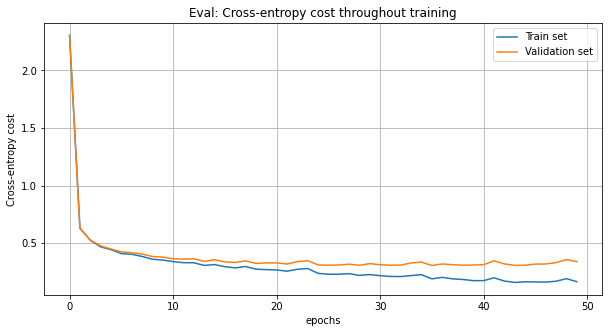

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10, 5])
plt.plot(cross_entropy_cost_train, label = 'Train set')
plt.plot(cross_entropy_cost_val, label = 'Validation set')
plt.xlabel('epochs')
plt.ylabel('Cross-entropy cost')
plt.title('Eval: Cross-entropy cost throughout training')
plt.legend()
plt.grid()

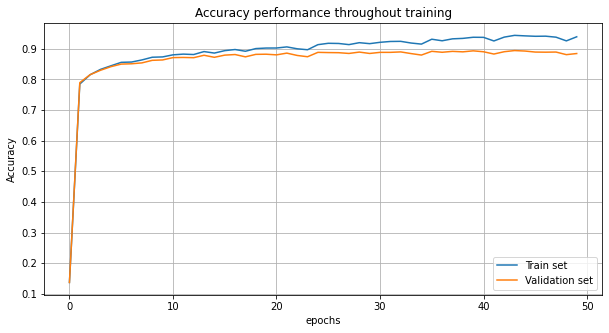

In [ ]:
plt.figure(figsize = [10, 5])
plt.plot(accuracy_train, label = 'Train set')
plt.plot(accuracy_val, label = 'Validation set')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy performance throughout training')
plt.legend()
plt.grid()

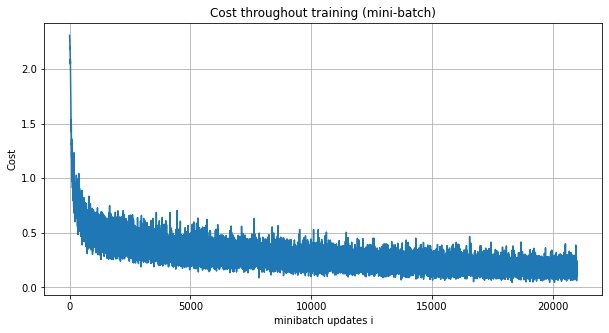

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost
plt.figure(figsize = [10, 5])
plt.plot(training_minibatch_Js)
plt.xlabel('minibatch updates i')
plt.ylabel('Cost')
plt.title('Cost throughout training (mini-batch)')
plt.grid()

In [ ]:
len(test_data)

test_dataloader = DataLoader(dataset = test_data, batch_size = len(test_data))

with torch.no_grad():
    for X, y in test_dataloader:
        raw_y_preds = model(X) # predict model output for X in test dataset

    y_class_preds = raw_y_preds.argmax(dim = 1)
    cost = cost_function(raw_y_preds, y).item()

acc = accuracy_score(y_pred = y_class_preds, y_true = y)

In [ ]:
print("The cost in the test dataset is {: .3}.".format(cost))

The cost in the test dataset is  0.338.


In [ ]:
print("The accuracy in the test dataset is {}.".format(acc))

The accuracy in the test dataset is 0.8885.
